In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [11]:
# Load the datasets
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')


In [12]:
# Exploratory Data Analysis (EDA) on train data
# Summary statistics
print(train_data.describe())
print(train_data.info())


                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000

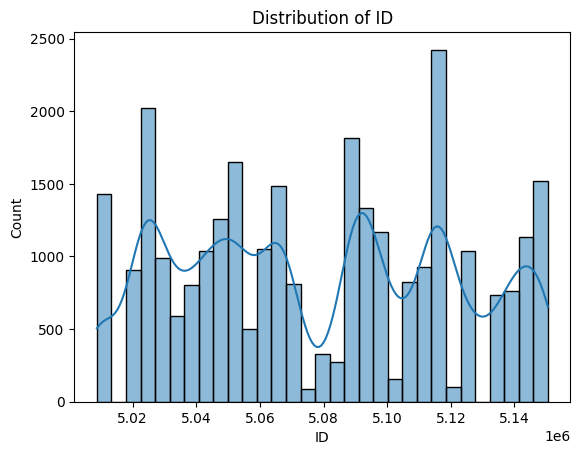

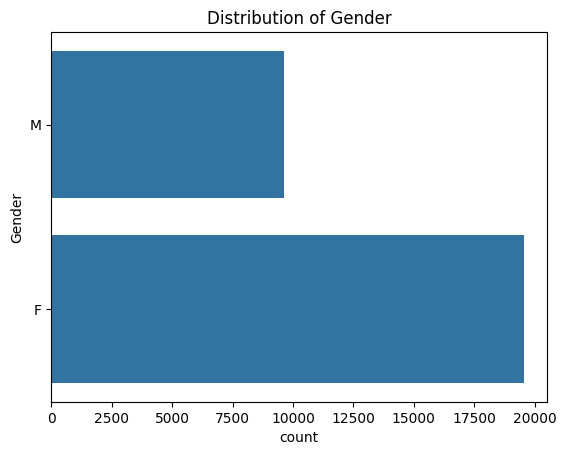

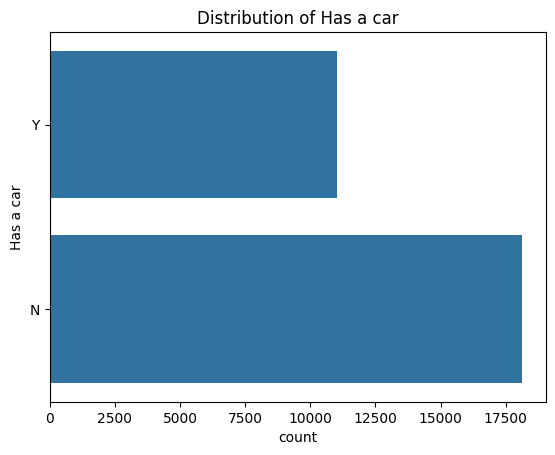

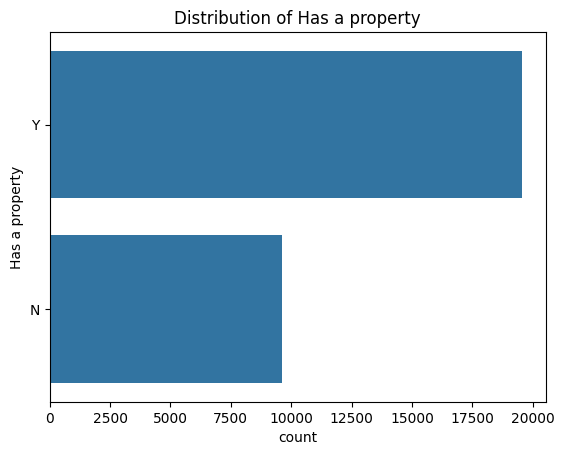

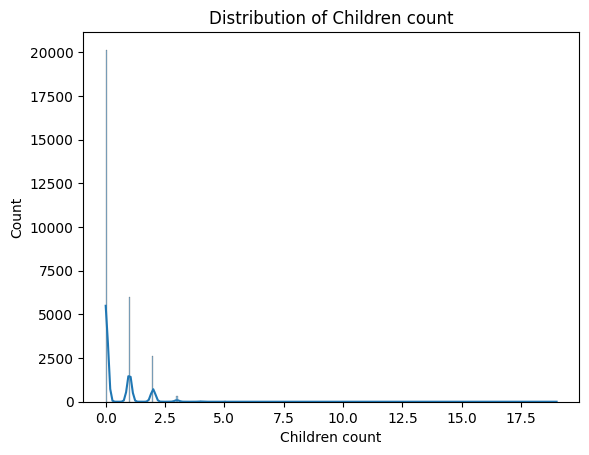

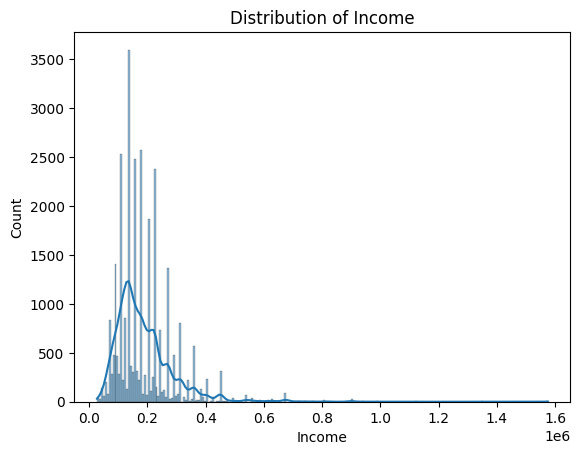

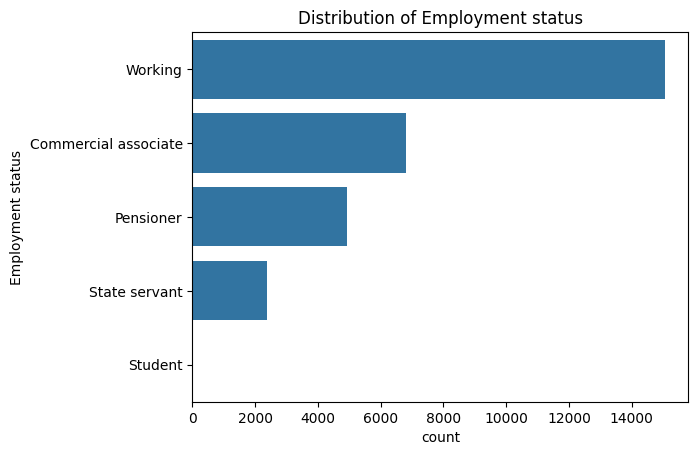

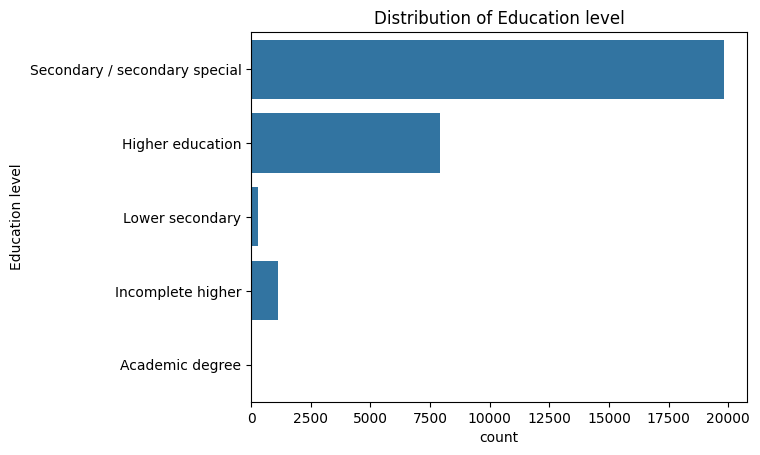

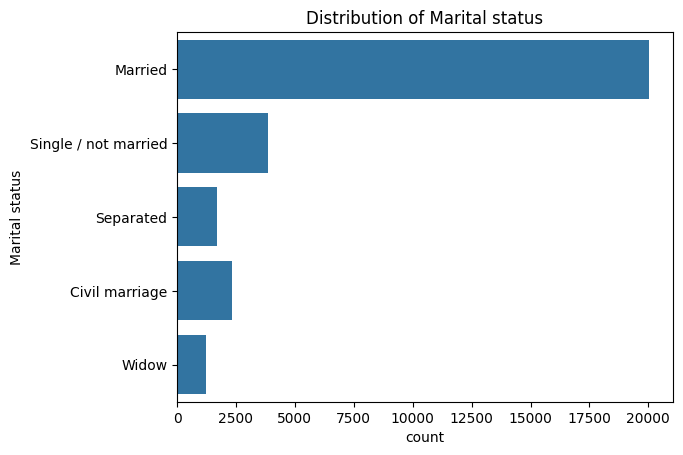

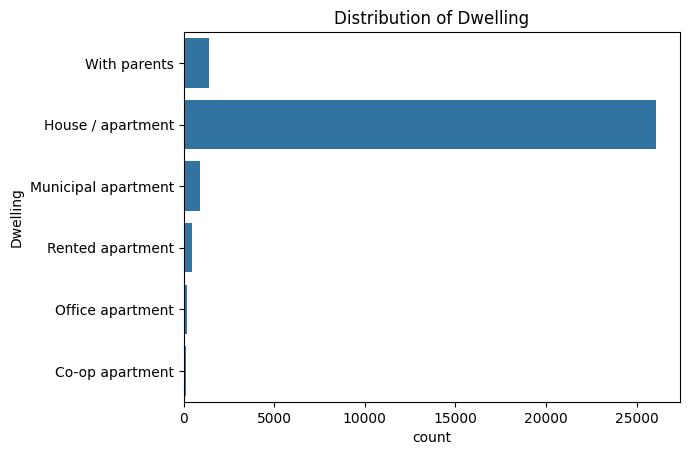

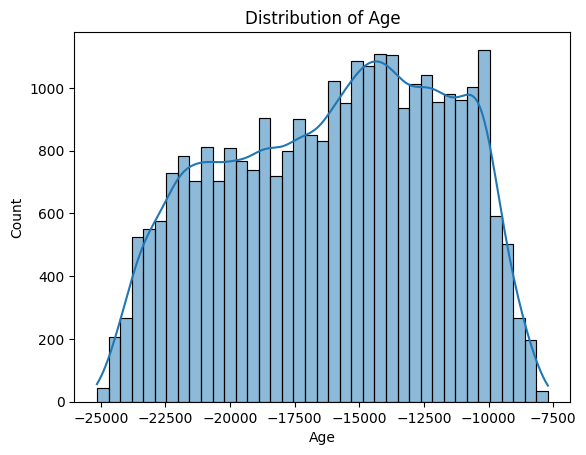

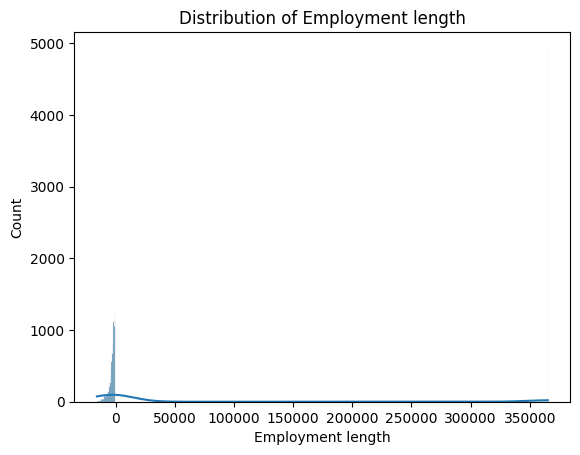

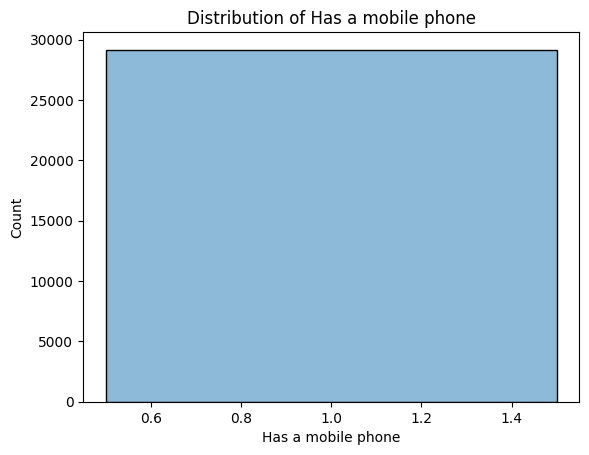

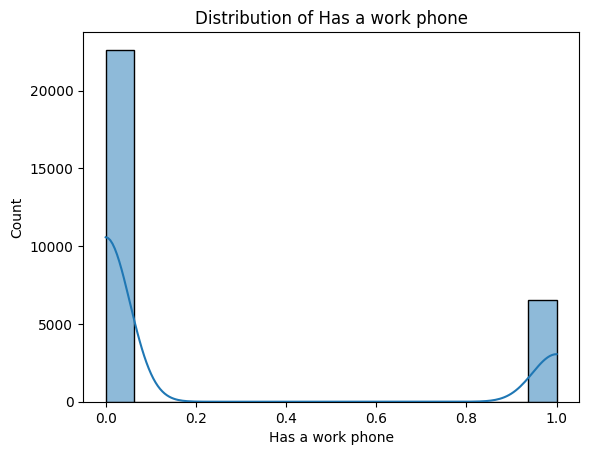

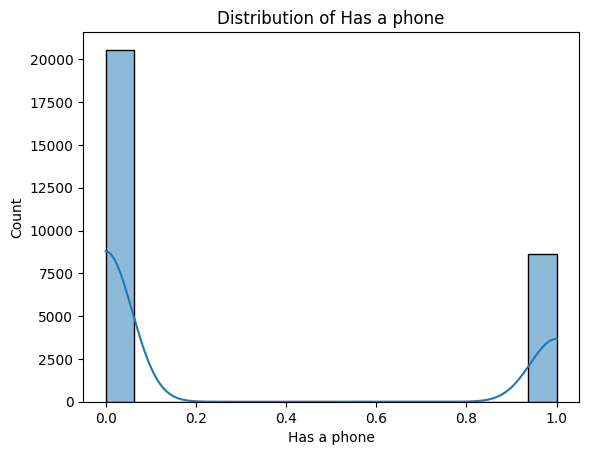

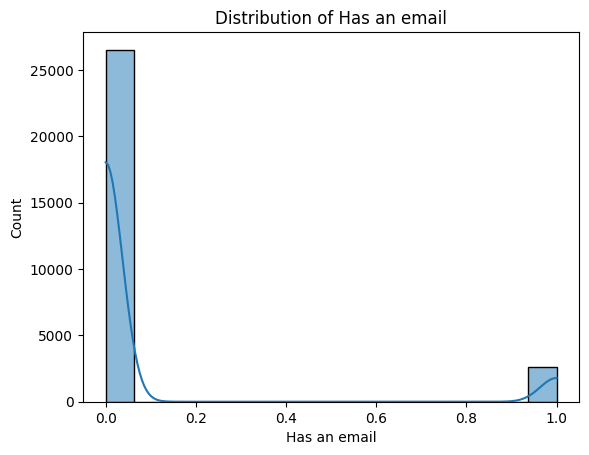

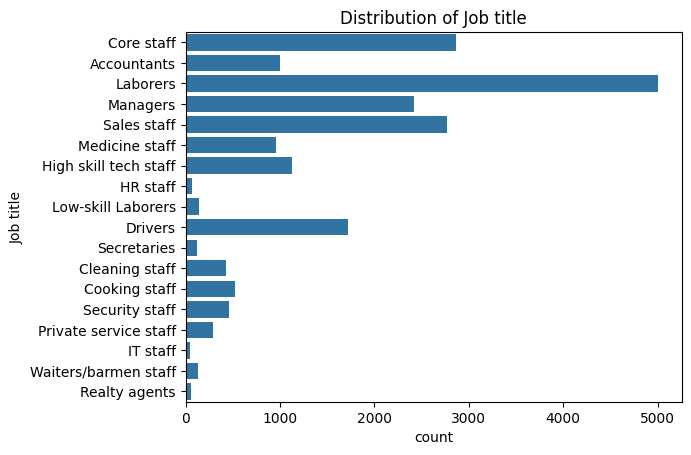

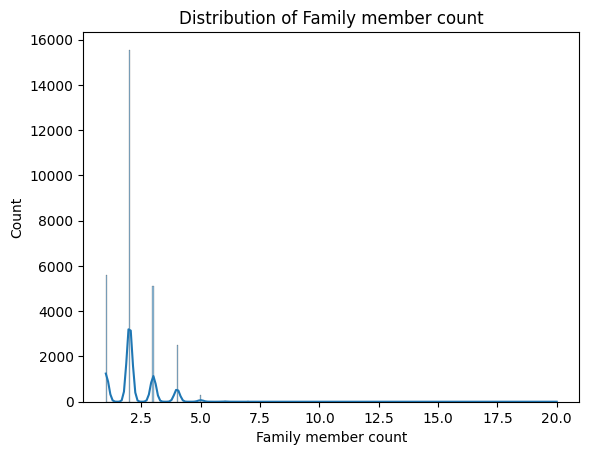

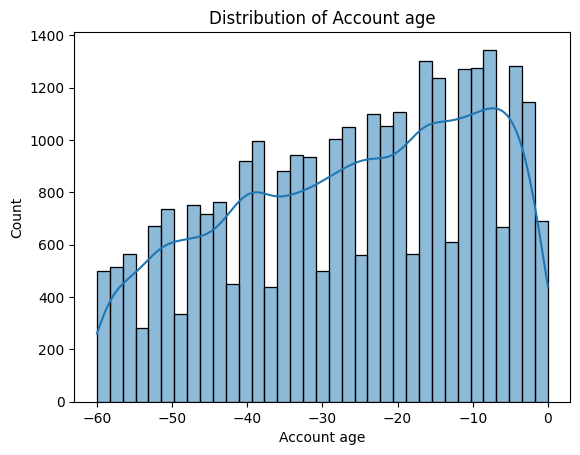

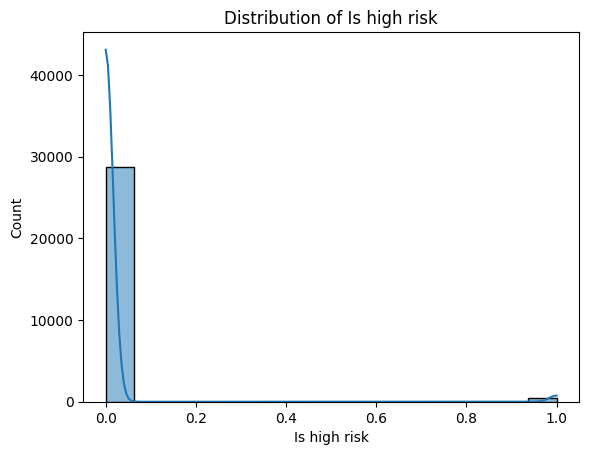

In [13]:
# Univariate Analysis
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        sns.countplot(train_data[col])
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        sns.histplot(train_data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()


ID                       int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Age                      int64
Employment length        int64
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count    float64
Account age            float64
Is high risk             int64
dtype: object
(29165, 20)


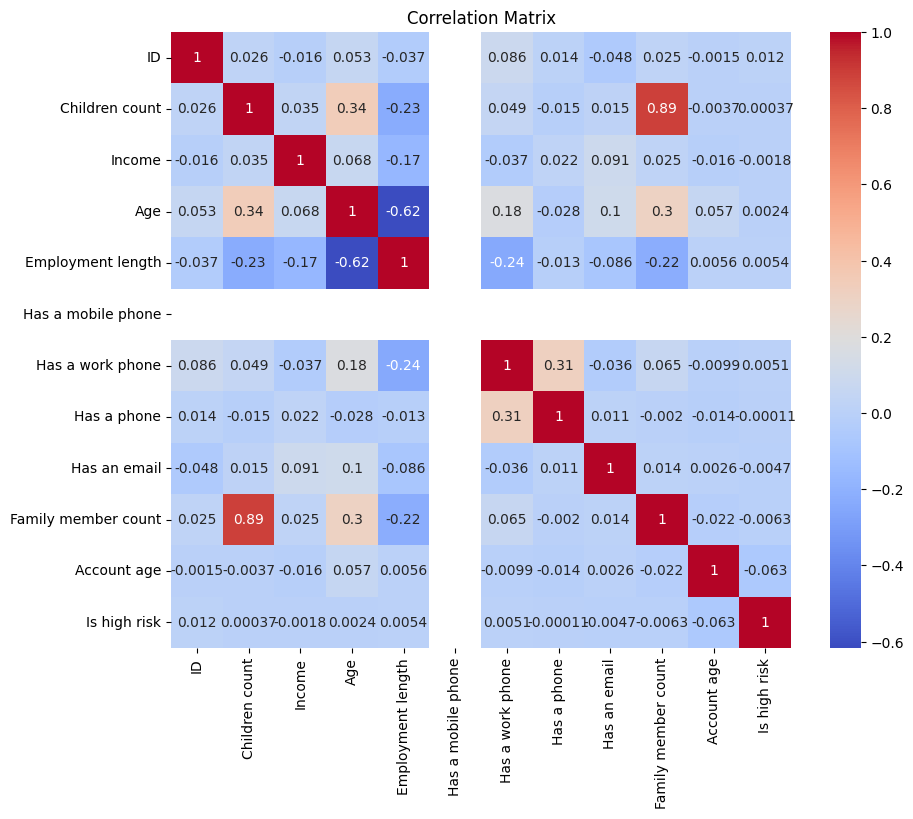

In [14]:
print(train_data.dtypes)
print(train_data.shape)
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

# Plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Feature Engineering
train_data['Income_per_Family_Member'] = train_data['Income'] / (train_data['Family member count'] + 1)
test_data['Income_per_Family_Member'] = test_data['Income'] / (test_data['Family member count'] + 1)


In [16]:
# Data Preprocessing
# Separate target variable from train data
X_train = train_data.drop(columns=['ID', 'Is high risk'])
y_train = train_data['Is high risk']
X_test = test_data.drop(columns=['ID', 'Is high risk'])
y_test = test_data['Is high risk']


In [17]:
# Preprocessing pipeline
numeric_features = ['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age', 'Income_per_Family_Member']
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email', 'Job title']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [18]:
# Machine Learning Model Development
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [19]:
# Evaluate models
for model_name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Logistic Regression
Accuracy: 0.984503565551289
Precision: 1.0
Recall: 0.03418803418803419
F1 Score: 0.06611570247933884
ROC AUC: 0.5170940170940171
[[7175    0]
 [ 113    4]]


Model: Decision Tree
Accuracy: 0.9687328579264948
Precision: 0.1464968152866242
Recall: 0.19658119658119658
F1 Score: 0.1678832116788321
ROC AUC: 0.5889526191965216
[[7041  134]
 [  94   23]]


Model: Random Forest
Accuracy: 0.981897970378497
Precision: 0.36363636363636365
Recall: 0.17094017094017094
F1 Score: 0.23255813953488372
ROC AUC: 0.5830310610798416
[[7140   35]
 [  97   20]]


Model: Gradient Boosting
Accuracy: 0.9838178826110806
Precision: 0.46153846153846156
Recall: 0.05128205128205128
F1 Score: 0.09230769230769231
ROC AUC: 0.5251532207629769
[[7168    7]
 [ 111    6]]




In [20]:
# Select the best model (based on evaluation metrics)
best_model = RandomForestClassifier()
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', best_model)])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


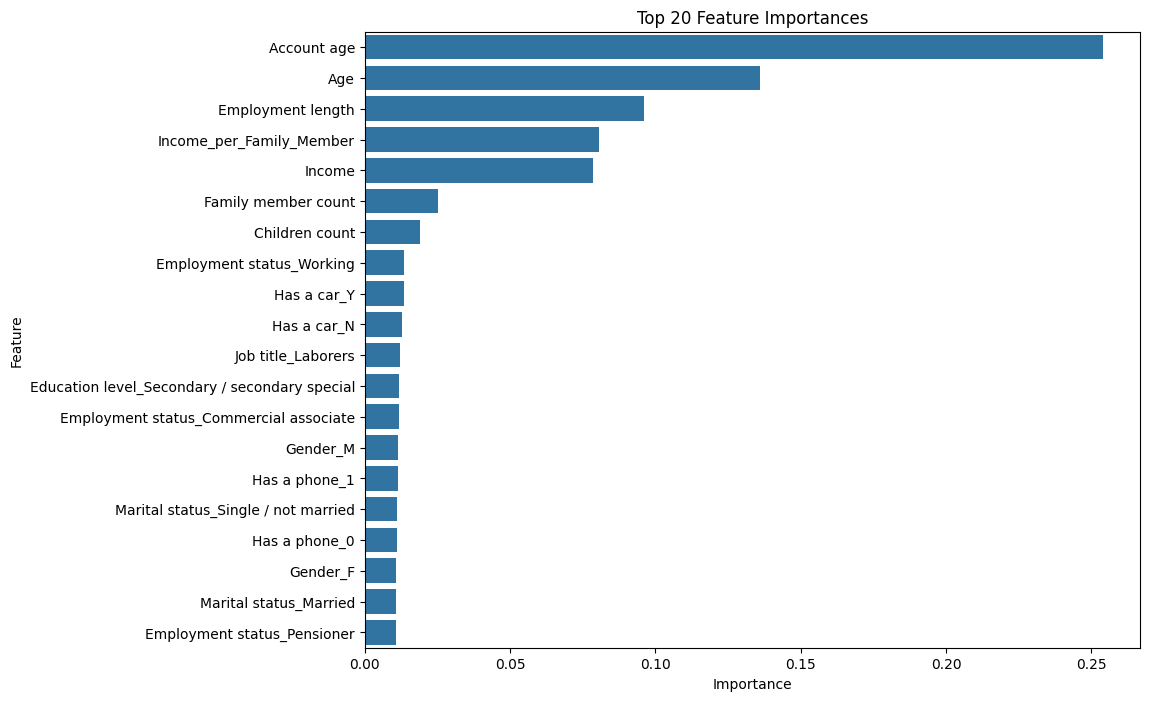

In [21]:

# Feature Importance
feature_importances = clf.named_steps['classifier'].feature_importances_
feature_names = preprocessor.transformers_[0][1].named_steps['scaler'].get_feature_names_out(numeric_features).tolist() + \
                preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()